In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import mahotas as mh

In [2]:
img = mh.imread("C:/Users/0rame/Desktop/ML_tutorials/Datas/Garden.jpeg")

In [3]:
img.shape

(191, 264, 3)

In [4]:
original_image = np.array(img)

In [5]:
original_image = np.array(mh.imread("C:/Users/0rame/Desktop/ML_tutorials/Datas/Garden.jpeg"),dtype=np.float32)/255

In [6]:
original_image.shape

(191, 264, 3)

In [7]:
width,height,depth = tuple(original_image.shape)

In [8]:
img_flattened = np.reshape(original_image,(width*height,depth))

In [9]:
from sklearn.utils import shuffle

In [10]:
image_array_samples = shuffle(img_flattened,random_state=0)[:1000]

In [11]:
image_array_samples.shape

(1000, 3)

In [12]:
estimator = KMeans(n_clusters=64,random_state=0)

In [13]:
estimator.fit(image_array_samples)

C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=64, random_state=0)

In [14]:
np.unique(estimator.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [15]:
cluster_assignment = estimator.predict(img_flattened)

In [16]:
compressed_pallete = estimator.cluster_centers_

In [17]:
compressed_array = np.zeros((width,height,compressed_pallete.shape[1]))

In [18]:
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_array[i][j] = compressed_pallete[cluster_assignment[label_idx]]
        label_idx += 1

In [19]:
compressed_array

array([[[0.01557425, 0.14879549, 0.11663866],
        [0.06160128, 0.19526142, 0.18153593],
        [0.00988919, 0.09241259, 0.06069908],
        ...,
        [0.57509804, 0.61156869, 0.39470589],
        [0.67045307, 0.71156192, 0.50926304],
        [0.57509804, 0.61156869, 0.39470589]],

       [[0.01557425, 0.14879549, 0.11663866],
        [0.00988919, 0.09241259, 0.06069908],
        [0.00988919, 0.09241259, 0.06069908],
        ...,
        [0.61740196, 0.67941177, 0.44926471],
        [0.57509804, 0.61156869, 0.39470589],
        [0.61740196, 0.67941177, 0.44926471]],

       [[0.00988919, 0.09241259, 0.06069908],
        [0.00988919, 0.09241259, 0.06069908],
        [0.00988919, 0.09241259, 0.06069908],
        ...,
        [0.51124871, 0.55748194, 0.34530446],
        [0.57509804, 0.61156869, 0.39470589],
        [0.67045307, 0.71156192, 0.50926304]],

       ...,

       [[0.19668177, 0.20150827, 0.28349924],
        [0.19668177, 0.20150827, 0.28349924],
        [0.19668177, 0

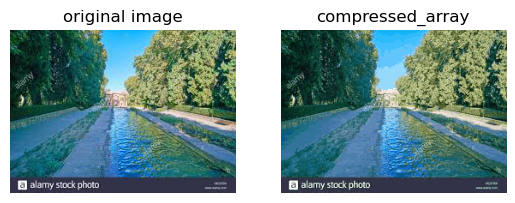

In [20]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('compressed_array')
plt.imshow(compressed_array)
plt.axis('off')
plt.show()